In [33]:
#cross entropy loss function is used for classification porblem
#california housing dataset
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
x=pd.DataFrame(housing.data, columns =housing.feature_names)
y=pd.DataFrame(housing.target, columns =['target'])

In [7]:
#downloading the housing dataset


In [8]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [31]:
from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full,y_test= train_test_split(x,y,random_state=0)
x_train,x_valid,y_train,y_valid = train_test_split(x_train_full,y_train_full)

In [32]:
scaler=StandardScaler()
x_train =scaler.fit_transform(x_train)
x_valid =scaler.transform(x_valid)
x_test =scaler.transform(x_test)

In [12]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [13]:
y # this is the target  which we have o regress in this regression problem

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [14]:
x_train.shape[1:]

(8,)

In [15]:
x_train

array([[-1.01970926,  1.8589316 , -0.27143165, ..., -0.01432218,
        -0.76489041,  1.10887518],
       [-0.6623669 ,  0.26694267, -0.32593241, ...,  0.08497315,
        -0.69473919,  0.82457542],
       [-0.18657989, -1.32504626,  3.32441472, ..., -0.04892439,
         1.02162737,  0.24101275],
       ...,
       [-0.64973492,  0.02814433, -0.11669327, ...,  0.06146809,
        -0.3065691 , -0.44230422],
       [-0.05677175, -0.44945234, -0.4566713 , ...,  0.50427728,
        -0.88180912,  0.84452628],
       [-0.24508869, -0.210654  , -0.07712209, ...,  0.09396869,
         1.50333242, -1.22038777]])

In [27]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30,activation="relu",input_shape =x_train.shape[1:]), # whenever we are creating network we have to define a share  of dtaata means input shape
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)])

model.compile(loss="mse",optimizer="SGD") # in regression problem we generally use "rmse" or "mse" loss function) 
history =model.fit(x_train,y_train,epochs=30,validation_data=(x_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: 0.8326 - val_loss: 0.5252
Epoch 2/30
363/363 [==============================] - 0s 919us/step - loss: 0.4688 - val_loss: 0.4326
Epoch 3/30
363/363 [==============================] - 0s 892us/step - loss: 0.4208 - val_loss: 0.4099
Epoch 4/30
363/363 [==============================] - 0s 873us/step - loss: 0.3941 - val_loss: 0.4446
Epoch 5/30
363/363 [==============================] - 0s 882us/step - loss: 0.3800 - val_loss: 0.3852
Epoch 6/30
363/363 [==============================] - 0s 897us/step - loss: 0.3746 - val_loss: 0.3750
Epoch 7/30
363/363 [==============================] - 0s 926us/step - loss: 0.3634 - val_loss: 0.3813
Epoch 8/30
363/363 [==============================] - 0s 934us/step - loss: 0.3588 - val_loss: 0.4036
Epoch 9/30
363/363 [==============================] - 0s 869us/step - loss: 0.3560 - val_loss: 0.3551
Epoch 10/30
363/363 [==============================] - 0s 889us/step - loss: 0.3508 

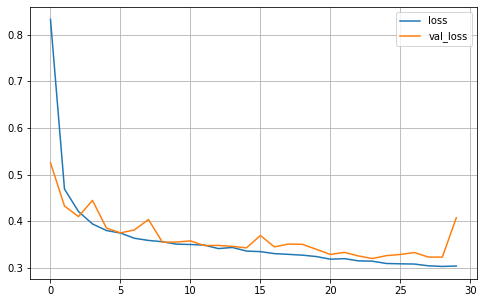

In [28]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize =(8,5))
plt.grid(True)

In [29]:
mse_test =Model.evaluate(x_test, y_test)
x_new = x_test[:3]
y_pred =Model.predict(x_new)

162/162 [==============================] - 0s 581us/step - loss: 0.2969


In [30]:
y_pred

array([[1.338784 ],
       [2.479331 ],
       [1.5958402]], dtype=float32)

In [34]:
model.compile(loss="mse",optimizer=tf.keras.optimizers.SGD(lr=1e-3)) # we are managing here lerning rate
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only =True) #we are calling here chevckpoint to save the model and it wll save best model

history =model.fit(x_train,y_train,epochs=10, validation_data=(x_valid,y_valid), callbacks=[checkpoint_cb])
model =tf.keras.models.load_model("my_keras_model.h5") #rollback to best model
mse_test = model.evaluate(x_test,y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.2992 - val_loss: 0.2903
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.2942 - val_loss: 0.2896
Epoch 3/10
363/363 [==============================] - 0s 925us/step - loss: 0.2932 - val_loss: 0.2904
Epoch 4/10
363/363 [==============================] - 0s 922us/step - loss: 0.2930 - val_loss: 0.2902
Epoch 5/10
363/363 [==============================] - 0s 879us/step - loss: 0.2918 - val_loss: 0.2901
Epoch 6/10
363/363 [==============================] - 0s 873us/step - loss: 0.2916 - val_loss: 0.2901
Epoch 7/10
363/363 [==============================] - 0s 869us/step - loss: 0.2912 - val_loss: 0.2913
Epoch 8/10
363/363 [==============================] - 0s 925us/step - loss: 0.2907 - val_loss: 0.2902
Epoch 9/10
363/363 [==============================] - 0s 852us/step - loss: 0.2903 - val_loss: 0.2905
Epoch 10/10
162/162 [==============================] - 0s 613us/step - loss: 0.3049


In [38]:
#now we will do early stopping as per the graph where our model wont learn anything at that stage our model will stop traininig
model.compile(loss="mse",optimizer =tf.keras.optimizers.SGD(lr=1e-3))
early_stopping_cb =tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights =True)
history =model.fit(x_train,y_train,epochs=100,validation_data =(x_valid,y_valid),callbacks=[checkpoint_cb,early_stopping_cb])
mse_test = model.evaluate=(x_test,y_test) # so here in output after 313 epochs our model has stopped learning  so it stopped

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.2937 - val_loss: 0.2896
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.2928 - val_loss: 0.2893
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.2922 - val_loss: 0.2893
Epoch 4/100
363/363 [==============================] - 0s 928us/step - loss: 0.2915 - val_loss: 0.2914
Epoch 5/100
363/363 [==============================] - 0s 882us/step - loss: 0.2912 - val_loss: 0.2895
Epoch 6/100
363/363 [==============================] - 0s 856us/step - loss: 0.2907 - val_loss: 0.2899
Epoch 7/100
363/363 [==============================] - 0s 886us/step - loss: 0.2900 - val_loss: 0.2915
Epoch 8/100
363/363 [==============================] - 0s 917us/step - loss: 0.2902 - val_loss: 0.2908
Epoch 9/100
363/363 [==============================] - 0s 925us/step - loss: 0.2898 - val_loss: 0.2911
Epoch 10/100
363/363 [==============================] - 0s 911us/step - loss: 0

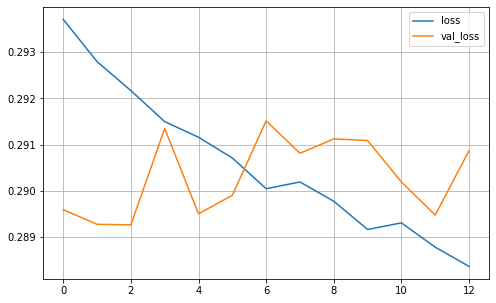

In [39]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)